# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import torch
import torch.nn as nn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
import plotly.graph_objs as go # plotly graphical object


import src.data.timeseries_eda as eda 

init_notebook_mode(connected=True)
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')

# config

In [3]:
symbol = 'EURUSD'

# EDA

In [4]:
market_data = pd.read_csv(f'data/{symbol}_1h.csv')
market_data.head()

,Unnamed: 0,open_time,open_bid,low_bid,high_bid,close_bid,volume_bid,open_ask,low_ask,high_ask,close_ask,volume_ask,close_time,month,year
0,0,2015-02-02 01:00:00,1.13082,1.13082,1.13157,1.13153,2712.48,1.13086,1.13086,1.13160,1.13156,2853.70,2015-02-02 02:00:00,2,2015
1,1,2015-02-02 02:00:00,1.13152,1.13135,1.13255,1.13179,2935.13,1.13156,1.13136,1.13257,1.13181,2945.25,2015-02-02 03:00:00,2,2015
2,2,2015-02-02 03:00:00,1.13180,1.13054,1.13180,1.13102,2610.78,1.13181,1.13057,1.13185,1.13103,2617.55,2015-02-02 04:00:00,2,2015
3,3,2015-02-02 04:00:00,1.13101,1.13084,1.13132,1.13084,1723.14,1.13103,1.13088,1.13136,1.13088,1489.47,2015-02-02 05:00:00,2,2015
4,4,2015-02-02 05:00:00,1.13085,1.13071,1.13134,1.13084,1966.10,1.13088,1.13073,1.13136,1.13085,1753.40,2015-02-02 06:00:00,2,2015


In [5]:
market_data['open_time'] = pd.to_datetime(market_data['open_time'])
market_data.set_index('open_time', inplace=True)
market_data.drop(columns='close_time', inplace=True)

In [6]:
#stationary = eda.Stationary(market_data)

#for feature in market_data.columns:
#    stationary.check(feature)
#    print('-'*20)

In [7]:
#stationary.check('close_ask')
#stationary.plot('close_ask')

In [8]:
#eda.plot_price_volume(market_data, kind = 'bid')

In [9]:
#eda.plot_candlestick(market_data, kind = 'bid')

In [10]:
#normality_checker = eda.Normality(market_data)
#list_of_features_to_be_normalized = []
#for col in market_data.columns:
#    if normality_checker.check(col):
#       continue
#    list_of_features_to_be_normalized.append(col)
#list_of_features_to_be_normalized 

# Features Engineering

In [11]:
from src.data.feature_engineering import PercentageFeatureAdder, BollingerBandAdder, TargetAdder,Scalar

percentage_feature_adder = PercentageFeatureAdder(1)
bidbb_adder = BollingerBandAdder(kind = 'bid')
askbb_adder = BollingerBandAdder(kind = 'ask')


pipeline = [bidbb_adder, askbb_adder, percentage_feature_adder]

In [12]:
transformed = market_data.copy()
for idx , trans in enumerate(pipeline):
    print(f'Transformation number: {idx + 1}')
    transformed = trans.transform(transformed)

Transformation number: 1
Transformation number: 2
Transformation number: 3


In [13]:
ready_to_train_features = ['volume_bid',
 'volume_ask',
 'month',
 'bid_golden/death',
 'bid_standard_deviation',
 'bid_bollinger_touch',
 'ask_golden/death',
 'ask_standard_deviation',
 'ask_bollinger_touch',
 'hhpc_bid_1',
 'llpc_bid_1',
 'hhpc_bid_3',
 'llpc_bid_3',
 'hplpcp_bid_1',
 'hplpcp_bid_3',
 'hplpcp_bid_4',
 'vvpavg3_bid',
 'vvp3avg3_bid',
 'hc_bid',
 'ho_bid',
 'co_bid',
 'hhpc_ask_1',
 'llpc_ask_1',
 'hhpc_ask_3',
 'llpc_ask_3',
 'hplpcp_ask_1',
 'hplpcp_ask_3',
 'hplpcp_ask_4',
 'vvpavg3_ask',
 'vvp3avg3_ask',
 'hc_ask',
 'ho_ask',
 'co_ask']

In [14]:
#stationary_checker = eda.Stationary(transformed)
#normality_checker = eda.Normality(transformed)

#ready_to_train_features = []
#for col in transformed.columns:
#    if not stationary_checker.check(col) :
#       continue
#    ready_to_train_features.append(col)

#ready_to_train_features

In [15]:
target_adder = TargetAdder(step_number=1 , look_back_steps =2)
transformed

,Unnamed: 0,open_bid,low_bid,high_bid,close_bid,volume_bid,open_ask,low_ask,high_ask,close_ask,...,hhpc_ask_3,llpc_ask_3,hplpcp_ask_1,hplpcp_ask_3,hplpcp_ask_4,vvpavg3_ask,vvp3avg3_ask,hc_ask,ho_ask,co_ask
open_time,,,,,,,,,,,,,,,,,,,,,
2015-02-03 06:00:00,29,1.13314,1.13260,1.13392,1.13387,3575.43,1.13316,1.13263,1.13395,1.13391,...,-0.000564,-0.000194,0.000980,0.001536,0.000715,0.009180,-0.190700,0.000035,0.000697,0.000662
2015-02-03 07:00:00,30,1.13387,1.13271,1.13475,1.13316,7018.44,1.13391,1.13274,1.13478,1.13319,...,0.001288,0.000168,0.001164,0.000679,0.001534,0.809215,0.696656,0.001401,0.000767,-0.000635
2015-02-03 08:00:00,31,1.13316,1.13216,1.13518,1.13243,11231.82,1.13320,1.13218,1.13521,1.13246,...,0.001660,-0.000035,0.001800,0.000979,0.000679,0.503776,1.037695,0.002422,0.001771,-0.000653
2015-02-03 09:00:00,32,1.13244,1.13124,1.13437,1.13334,10326.65,1.13246,1.13127,1.13438,1.13340,...,0.000379,-0.001200,0.002676,0.001166,0.000980,-0.108077,0.688065,0.000864,0.001693,0.000830
2015-02-03 10:00:00,33,1.13332,1.13317,1.13547,1.13504,7146.93,1.13340,1.13319,1.13549,1.13508,...,0.000625,0.000396,0.002744,0.001800,0.001165,-0.239124,0.037527,0.000361,0.001841,0.001482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14 00:00:00,52651,1.12244,1.12217,1.12280,1.12237,6880.17,1.12248,1.12220,1.12283,1.12241,...,0.000027,-0.000205,0.000499,0.000330,0.000668,0.844133,0.731353,0.000374,0.000312,-0.000062
2023-07-14 01:00:00,52652,1.12237,1.12134,1.12247,1.12229,16004.12,1.12240,1.12136,1.12249,1.12233,...,-0.000178,-0.000535,0.000561,0.000650,0.000330,1.057975,1.699762,0.000143,0.000080,-0.000062
2023-07-14 02:00:00,52653,1.12229,1.12221,1.12337,1.12336,19662.13,1.12232,1.12224,1.12341,1.12340,...,0.000374,-0.000169,0.001007,0.000499,0.000650,0.204334,1.104133,0.000009,0.000970,0.000962


In [16]:
target_adder.transform(transformed)

,Unnamed: 0,open_bid,low_bid,high_bid,close_bid,volume_bid,open_ask,low_ask,high_ask,close_ask,...,hplpcp_ask_4,vvpavg3_ask,vvp3avg3_ask,hc_ask,ho_ask,co_ask,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid
open_time,,,,,,,,,,,,,,,,,,,,,
2015-02-03 06:00:00,29,1.13314,1.13260,1.13392,1.13387,3575.43,1.13316,1.13263,1.13395,1.13391,...,0.000715,0.009180,-0.190700,0.000035,0.000697,0.000662,NaN,NaN,NaN,NaN
2015-02-03 07:00:00,30,1.13387,1.13271,1.13475,1.13316,7018.44,1.13391,1.13274,1.13478,1.13319,...,0.001534,0.809215,0.696656,0.001401,0.000767,-0.000635,NaN,NaN,NaN,NaN
2015-02-03 08:00:00,31,1.13316,1.13216,1.13518,1.13243,11231.82,1.13320,1.13218,1.13521,1.13246,...,0.000679,0.503776,1.037695,0.002422,0.001771,-0.000653,0.178263,0.084720,1.13316,1.13314
2015-02-03 09:00:00,32,1.13244,1.13124,1.13437,1.13334,10326.65,1.13246,1.13127,1.13438,1.13340,...,0.000980,-0.108077,0.688065,0.000864,0.001693,0.000830,0.040570,0.229299,1.13391,1.13387
2015-02-03 10:00:00,33,1.13332,1.13317,1.13547,1.13504,7146.93,1.13340,1.13319,1.13549,1.13508,...,0.001165,-0.239124,0.037527,0.000361,0.001841,0.001482,0.200316,-0.002651,1.13320,1.13316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14 00:00:00,52651,1.12244,1.12217,1.12280,1.12237,6880.17,1.12248,1.12220,1.12283,1.12241,...,0.000668,0.844133,0.731353,0.000374,0.000312,-0.000062,0.036526,0.016038,1.12239,1.12238
2023-07-14 01:00:00,52652,1.12237,1.12134,1.12247,1.12229,16004.12,1.12240,1.12136,1.12249,1.12233,...,0.000330,1.057975,1.699762,0.000143,0.000080,-0.000062,-0.002666,0.096222,1.12250,1.12244
2023-07-14 02:00:00,52653,1.12229,1.12221,1.12337,1.12336,19662.13,1.12232,1.12224,1.12341,1.12340,...,0.000650,0.204334,1.104133,0.000009,0.000970,0.000962,0.079290,0.017821,1.12248,1.12244


In [17]:
normality_checker = eda.Normality(transformed.iloc[-2000:])

In [18]:
normality_checker.check('high_bid_change_rate_target')

False

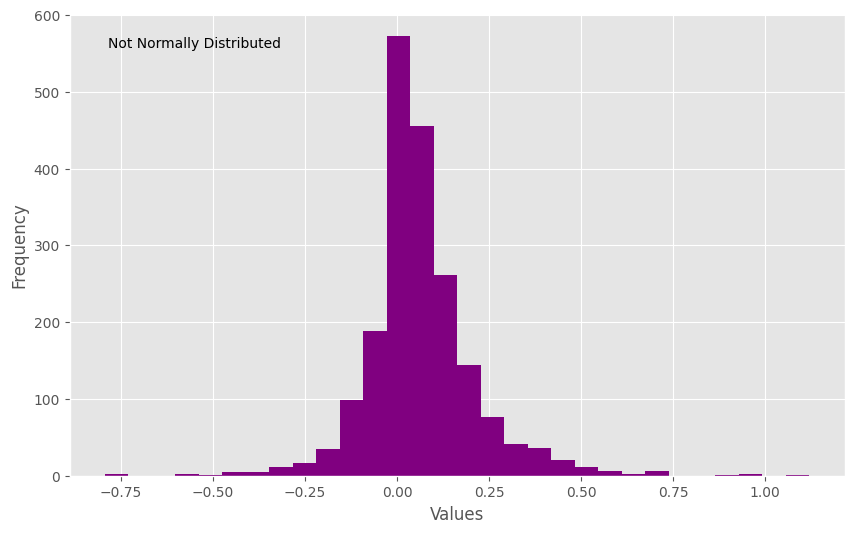

In [19]:
normality_checker.plot('high_bid_change_rate_target')

<Axes: >

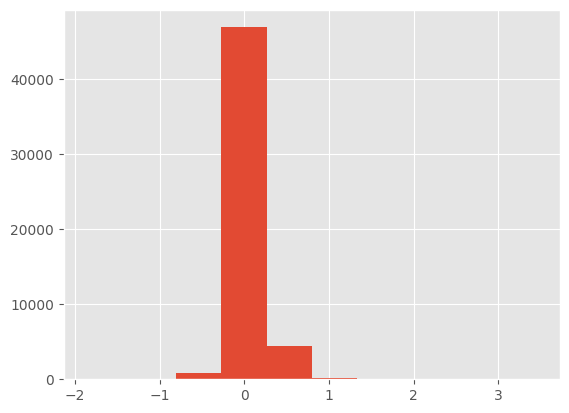

In [20]:
transformed['high_bid_change_rate_target'].hist()

In [21]:
# add retransform method to the target adder (goining from target to abs price) dobe 
# Scaler(Tranformer) , transform and retransform , scale a set of input features (fit, transform, retransform) done 
# Dataset class for your Pytorch model  
# train your model and try to refactor the training code to be re-usable
# evaluatin of models think about adding metrics and plots 
# move the Wavelet to the feature eng part and make it as a Tranformer: implementation done 
#    * denoise input data then make features 
#    * denoise the features directly 
# prepare in the evalutaion part a way to copmare the models performance 
# add the mlp auto-encoder denoiser and try to copmare results ( no-denoising vs wavelet vs auto-encoder) 

In [22]:
transformed.columns

Index(['Unnamed: 0', 'open_bid', 'low_bid', 'high_bid', 'close_bid',
       'volume_bid', 'open_ask', 'low_ask', 'high_ask', 'close_ask',
       'volume_ask', 'month', 'year', 'bid_golden/death',
       'bid_standard_deviation', 'bid_upper_band', 'bid_lower_band',
       'bid_middle_band', 'bid_bollinger_touch', 'ask_golden/death',
       'ask_standard_deviation', 'ask_upper_band', 'ask_lower_band',
       'ask_middle_band', 'ask_bollinger_touch', 'hhpc_bid_1', 'llpc_bid_1',
       'hhpc_bid_3', 'llpc_bid_3', 'hplpcp_bid_1', 'hplpcp_bid_3',
       'hplpcp_bid_4', 'vvpavg3_bid', 'vvp3avg3_bid', 'hc_bid', 'ho_bid',
       'co_bid', 'hhpc_ask_1', 'llpc_ask_1', 'hhpc_ask_3', 'llpc_ask_3',
       'hplpcp_ask_1', 'hplpcp_ask_3', 'hplpcp_ask_4', 'vvpavg3_ask',
       'vvp3avg3_ask', 'hc_ask', 'ho_ask', 'co_ask',
       'high_bid_change_rate_target', 'low_ask_change_rate_target',
       'last_open_ask', 'last_open_bid'],
      dtype='object')

In [23]:
feature=ready_to_train_features
target=['high_bid_change_rate_target', 'low_ask_change_rate_target']

# Models Training

In [24]:
from src.data.dataloader import CreateDataset

my_dataset = CreateDataset(transformed, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.294,0.084)

In [25]:
from src.data.feature_engineering import Scalar
scalar = Scalar()



In [26]:
#after denoise, recreate 
my_dataset = CreateDataset(transformed, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.294,0.084)
train_data[feature] = scalar.fit_transform(train_data[feature]) 
valid_data[feature] = scalar.transform(valid_data[feature])
test_data[feature] = scalar.transform(test_data[feature])

train_dataset = my_dataset.create_dataset(train_data)
valid_dataset = my_dataset.create_dataset(valid_data)
test_dataset = my_dataset.create_dataset(test_data)

train_loader = my_dataset.create_loader(train_dataset, 128)
valid_loader = my_dataset.create_loader(valid_dataset, 128)
test_loader = my_dataset.create_loader(test_dataset, 128)

In [27]:
#lstm Autoencoder

from src.models.autoencoder import LSTMAutoencoderTrainer, LSTMAutoencoder
input_size = len(feature)
hidden_size = input_size//2

model = LSTMAutoencoder(input_size, hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
trainer = LSTMAutoencoderTrainer(model, optimizer, criterion)


num_epochs = 200
trainer.fit(train_loader, num_epochs)


decoded_data,idx = trainer.transform(train_loader)

Epoch [10/200], Loss: 0.012083593044735608
Epoch [20/200], Loss: 0.0015666599351789046
Epoch [30/200], Loss: 0.0012255802881782074
Epoch [40/200], Loss: 0.0010498787996766623
Epoch [50/200], Loss: 0.0009744753412519458
Epoch [60/200], Loss: 0.0009168732556190662
Epoch [70/200], Loss: 0.0008183501737448751
Epoch [80/200], Loss: 0.0006371967070890605
Epoch [90/200], Loss: 0.00039735792381634383
Epoch [100/200], Loss: 0.0002159191542290273
Epoch [110/200], Loss: 0.00017193944655957694
Epoch [120/200], Loss: 0.00014947429322376138
Epoch [130/200], Loss: 0.00012984802184945465
Epoch [140/200], Loss: 0.0001151614546017754
Epoch [150/200], Loss: 0.00010366211402157433
Epoch [160/200], Loss: 9.473304019991247e-05
Epoch [170/200], Loss: 8.776712969904565e-05
Epoch [180/200], Loss: 8.16111713106693e-05
Epoch [190/200], Loss: 7.63158394008201e-05
Epoch [200/200], Loss: 7.170551777591072e-05


In [28]:

train_data=train_data.iloc[10:]
train_data[feature]=decoded_data[:,-1,:]

train_dataset = my_dataset.create_dataset(train_data)
train_loader = my_dataset.create_loader(train_dataset, 128)

In [29]:
DEVICE = 'cuda' 
BATCH_SIZE = 32 
MAX_WAIT = 3
EPOCHS = 25 
LR = 1e-4

In [30]:
from src.models import nn_trainer, lstm_forecaster
import torch
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler

rnn_model = lstm_forecaster.RNN(
    input_size = len(feature),
    output_size = 2 
    )

loss_fn = nn.MSELoss() 
optimizer = torch.optim.AdamW(params = rnn_model.parameters() , lr = LR)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [31]:

train_rnn = nn_trainer.Trainer(rnn_model , optimizer , train_loader , valid_loader, EPOCHS, MAX_WAIT, DEVICE, loss_fn,scheduler)
train_losses , valid_losses = train_rnn.fit()

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.04804305744565223
valid_loss = 0.021693585067987443


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.043526840057562695
valid_loss = 0.021615097112953664


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.04345558560645777
valid_loss = 0.02161561998405627


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.04345544466887377
valid_loss = 0.021616145303206786


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.043452889658510685
valid_loss = 0.021616889935519013


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.043451505336017646
valid_loss = 0.02161785965519292
EARLY STOPPING AT EPOCH = 5


# Evaluation

In [32]:
from src.eval.metrics import ForecastEval

In [33]:
indexes , high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)
indexes_datetime = pd.to_datetime(indexes)

In [34]:
predictions = pd.DataFrame(
    data = {
        'high_bid_change_rate_target': high_bid_predictions,
        'low_ask_change_rate_target': low_ask_predictions,
    },
    index = indexes_datetime
)   
predictions[['last_open_ask','last_open_bid']] = test_data[['last_open_ask','last_open_bid']]
predictions.head()

,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid
2018-04-11 21:00:00,0.069046,0.060547,1.23627,1.23625
2018-04-11 22:00:00,0.068942,0.060356,1.23618,1.23615
2018-04-11 23:00:00,0.068813,0.060135,1.23681,1.23664
2018-04-12 00:00:00,0.068764,0.060026,1.23678,1.23671
2018-04-12 01:00:00,0.068866,0.060186,1.23703,1.23699


In [35]:
predictions = target_adder.retransform(predictions)

In [36]:
orginal_test_data = market_data[['open_ask','open_bid','low_ask','high_bid','close_ask','close_bid']].loc[predictions.index]

<Axes: >

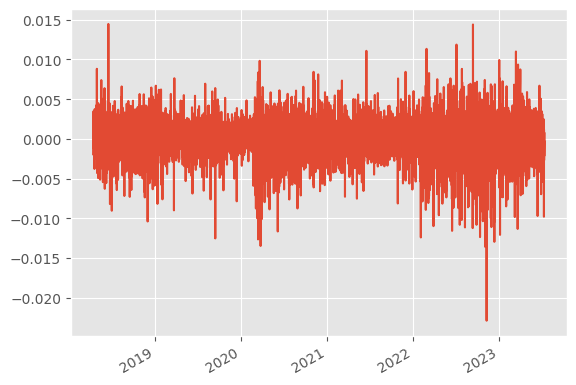

In [37]:
(predictions['high_bid'] - orginal_test_data['high_bid']).plot()

Position Accuracy: 2.52%
ABS error:  29109.637128514572


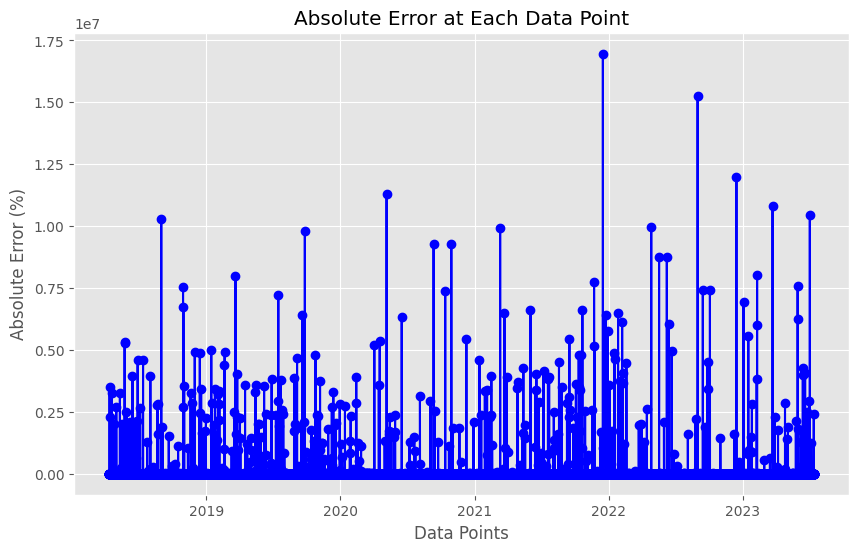

In [38]:
evaluator= ForecastEval(orginal_data= orginal_test_data , predicted_data = predictions)
evaluator.run_evaluation()

In [39]:
(orginal_test_data['high_bid']>predictions['high_bid']).mean()*100

38.30151737640725

In [40]:
(orginal_test_data['low_ask']>predictions['low_ask']).mean()*100

58.474057758198725

In [41]:
orginal_test_data.to_csv('data/predictions/original_test_data_with_lstmAE.csv')
predictions.to_csv('data/predictions/predictions_with_lstmAE.csv')

# Anomaly Detection: Autoencoder vs. Prediction

In [42]:
feature=['high_bid_change_rate_target', 'low_ask_change_rate_target']
target=['high_bid_change_rate_target', 'low_ask_change_rate_target']
# decoded_test,idx = trainer.transform(test_loader)

In [43]:
my_dataset = CreateDataset(transformed, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.294,0.084)


train_dataset = my_dataset.create_dataset(train_data)
valid_dataset = my_dataset.create_dataset(valid_data)
test_dataset = my_dataset.create_dataset(test_data)

train_loader = my_dataset.create_loader(train_dataset, 128)
valid_loader = my_dataset.create_loader(valid_dataset, 128)
test_loader = my_dataset.create_loader(test_dataset, 128)

In [65]:
from src.models.autoencoder import LSTMAutoencoderTrainer, LSTMAutoencoder
from src.models import n2n
input_size = len(feature)
hidden_size = 2
class Config:
    def __init__(self, window_size, hidden_size):
        self.window_size = window_size
        self.hidden_size = hidden_size
config = Config(window_size=10, hidden_size=2)
model = n2n.TimeSeriesAutoEnc(config, input_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
trainer = LSTMAutoencoderTrainer(model, optimizer, criterion)


num_epochs = 200
trainer.fit(train_loader, num_epochs)


result,idx = trainer.transform(test_loader)



Epoch [10/200], Loss: 4.449180580209941
Epoch [20/200], Loss: 4.066883654799312
Epoch [30/200], Loss: 3.9740731213241816
Epoch [40/200], Loss: 3.9415033739060163
Epoch [50/200], Loss: 3.925068266224116
Epoch [60/200], Loss: 3.914846921339631
Epoch [70/200], Loss: 3.9098462853580713


KeyboardInterrupt: 

In [45]:
decoded_data=result[:,-1,:]
decoded_data

tensor([[-0.0084,  0.0922],
        [ 0.0588, -0.0147],
        [ 0.0745, -0.0405],
        ...,
        [-0.0012,  0.0946],
        [ 0.0773,  0.0181],
        [ 0.1281, -0.0639]])

In [46]:
idx = pd.Series(idx)

idx= idx.shift(1)

indexes_datetime = pd.to_datetime(idx)
indexes_datetime 

0                       NaT
1       2018-04-11 21:00:00
2       2018-04-11 22:00:00
3       2018-04-11 23:00:00
4       2018-04-12 00:00:00
                ...        
32683   2023-07-13 23:00:00
32684   2023-07-14 00:00:00
32685   2023-07-14 01:00:00
32686   2023-07-14 02:00:00
32687   2023-07-14 03:00:00
Length: 32688, dtype: datetime64[ns]

In [47]:
decoded_data = pd.concat([pd.DataFrame({'datetime': indexes_datetime}),
                           pd.DataFrame(decoded_data.numpy(), columns=['high_bid_change_rate_target',
        'low_ask_change_rate_target'])
], axis=1)
decoded_data.index = indexes_datetime

print(decoded_data)

                               datetime  high_bid_change_rate_target  \
NaT                                 NaT                    -0.008438   
2018-04-11 21:00:00 2018-04-11 21:00:00                     0.058819   
2018-04-11 22:00:00 2018-04-11 22:00:00                     0.074477   
2018-04-11 23:00:00 2018-04-11 23:00:00                     0.034746   
2018-04-12 00:00:00 2018-04-12 00:00:00                     0.095028   
...                                 ...                          ...   
2023-07-13 23:00:00 2023-07-13 23:00:00                     0.044648   
2023-07-14 00:00:00 2023-07-14 00:00:00                     0.037009   
2023-07-14 01:00:00 2023-07-14 01:00:00                    -0.001229   
2023-07-14 02:00:00 2023-07-14 02:00:00                     0.077342   
2023-07-14 03:00:00 2023-07-14 03:00:00                     0.128067   

                     low_ask_change_rate_target  
NaT                                    0.092196  
2018-04-11 21:00:00                

In [48]:
decoded_data[['last_open_ask','last_open_bid']] = predictions[['last_open_ask','last_open_bid']]
decoded_data

,datetime,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid
NaT,NaT,-0.008438,0.092196,NaN,NaN
2018-04-11 21:00:00,2018-04-11 21:00:00,0.058819,-0.014716,1.23627,1.23625
2018-04-11 22:00:00,2018-04-11 22:00:00,0.074477,-0.040488,1.23618,1.23615
2018-04-11 23:00:00,2018-04-11 23:00:00,0.034746,-0.011336,1.23681,1.23664
2018-04-12 00:00:00,2018-04-12 00:00:00,0.095028,-0.033298,1.23678,1.23671
...,...,...,...,...,...
2023-07-13 23:00:00,2023-07-13 23:00:00,0.044648,0.001645,1.12245,1.12244
2023-07-14 00:00:00,2023-07-14 00:00:00,0.037009,0.016238,1.12239,1.12238
2023-07-14 01:00:00,2023-07-14 01:00:00,-0.001229,0.094591,1.12250,1.12244
2023-07-14 02:00:00,2023-07-14 02:00:00,0.077342,0.018056,1.12248,1.12244


In [49]:
decoded_data = target_adder.retransform(decoded_data)
decoded_data

,datetime,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid,high_bid,low_ask
NaT,NaT,-0.008438,0.092196,NaN,NaN,NaN,NaN
2018-04-11 21:00:00,2018-04-11 21:00:00,0.058819,-0.014716,1.23627,1.23625,1.236997,1.236432
2018-04-11 22:00:00,2018-04-11 22:00:00,0.074477,-0.040488,1.23618,1.23615,1.237101,1.236651
2018-04-11 23:00:00,2018-04-11 23:00:00,0.034746,-0.011336,1.23681,1.23664,1.237240,1.236780
2018-04-12 00:00:00,2018-04-12 00:00:00,0.095028,-0.033298,1.23678,1.23671,1.237955,1.237122
...,...,...,...,...,...,...,...
2023-07-13 23:00:00,2023-07-13 23:00:00,0.044648,0.001645,1.12245,1.12244,1.122951,1.122422
2023-07-14 00:00:00,2023-07-14 00:00:00,0.037009,0.016238,1.12239,1.12238,1.122805,1.122198
2023-07-14 01:00:00,2023-07-14 01:00:00,-0.001229,0.094591,1.12250,1.12244,1.122486,1.121378
2023-07-14 02:00:00,2023-07-14 02:00:00,0.077342,0.018056,1.12248,1.12244,1.123348,1.122237


In [50]:
predictions

,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid,high_bid,low_ask
2018-04-11 21:00:00,0.069046,0.060547,1.23627,1.23625,1.237124,1.235502
2018-04-11 22:00:00,0.068942,0.060356,1.23618,1.23615,1.237032,1.235404
2018-04-11 23:00:00,0.068813,0.060135,1.23681,1.23664,1.237661,1.235896
2018-04-12 00:00:00,0.068764,0.060026,1.23678,1.23671,1.237631,1.235968
2018-04-12 01:00:00,0.068866,0.060186,1.23703,1.23699,1.237882,1.236245
...,...,...,...,...,...,...
2023-07-14 00:00:00,0.068764,0.060067,1.12239,1.12238,1.123162,1.121706
2023-07-14 01:00:00,0.068845,0.060139,1.12250,1.12244,1.123273,1.121765
2023-07-14 02:00:00,0.069123,0.060528,1.12248,1.12244,1.123256,1.121761
2023-07-14 03:00:00,0.069338,0.060876,1.12240,1.12237,1.123178,1.121687


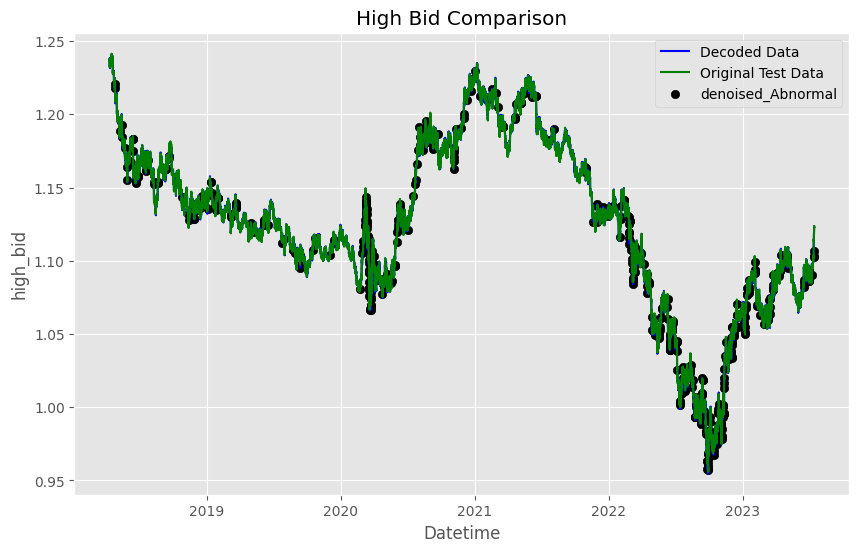

In [51]:

from src.eval.plots import  plot_comparison
plot_comparison(predictions, orginal_test_data, threshold=0.005,column_name='high_bid')


<Axes: >

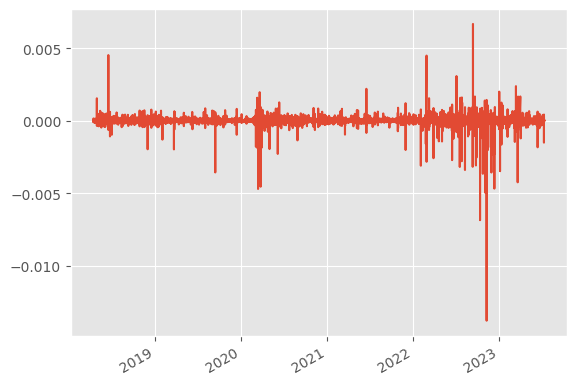

In [52]:
(decoded_data['high_bid'] - orginal_test_data['high_bid']).plot()

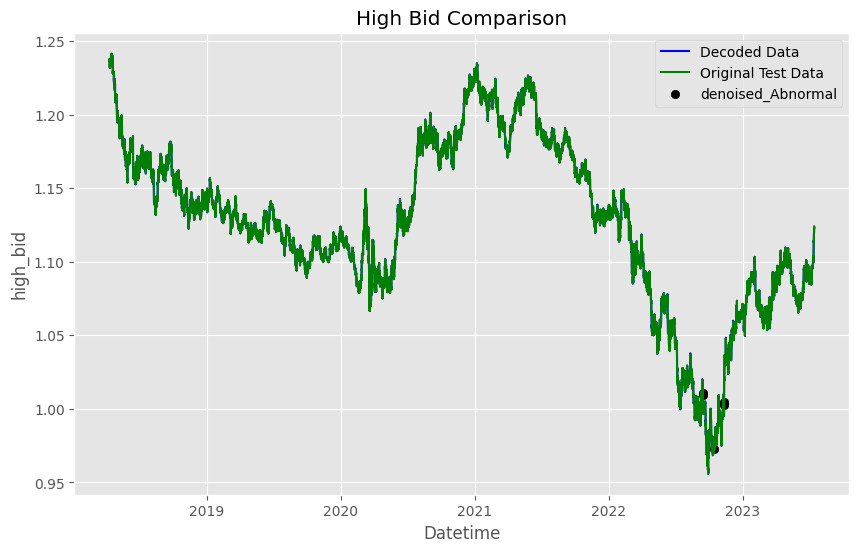

In [53]:
plot_comparison(decoded_data,orginal_test_data,threshold=0.005,column_name='high_bid')




[(Timestamp('2020-06-04 12:00:00'), 5), (Timestamp('2022-09-28 14:00:00'), 5)]


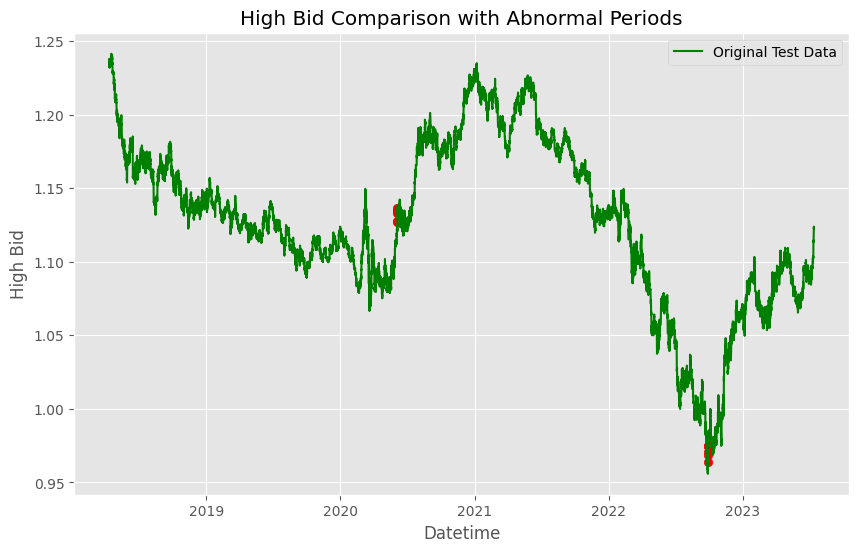

In [54]:
#Detect abnormal period
from src.eval.plots import plot_abnormal_period 
plot_abnormal_period(predictions, orginal_test_data, threshold = 0.005)

In [55]:
from src.eval.plots import check_overlap
check_overlap(predictions, decoded_data, orginal_test_data, threshold = 0.005,column_name='high_bid')

Index Overlap: DatetimeIndex(['2022-09-13 13:00:00', '2022-09-13 14:00:00',
               '2022-10-13 15:00:00', '2022-11-10 13:00:00',
               '2022-11-10 14:00:00', '2022-11-10 15:00:00'],
              dtype='datetime64[ns]', freq=None)


# Market Classification

In [56]:
def split_market(predictions, orginal_test_data, abnormal_indices):
    normal_market_indices = predictions.index.difference(abnormal_indices)
    
    normal_market_predictions = predictions.loc[normal_market_indices]
    normal_market_orginal_data = orginal_test_data.loc[normal_market_indices]
    
    abnormal_market_predictions = predictions.loc[abnormal_indices]
    abnormal_market_orginal_data = orginal_test_data.loc[abnormal_indices]
    
    return normal_market_predictions, normal_market_orginal_data, abnormal_market_predictions, abnormal_market_orginal_data




In [57]:
from src.eval.plots import check_abnormal_indices,abnormal_interval
abnormal_indices=check_abnormal_indices(predictions, orginal_test_data, threshold=0.005,column_name='high_bid')
abnormal_period = abnormal_interval(predictions, abnormal_indices, 1)
abnormal_period

[DatetimeIndex(['2018-04-26 14:00:00', '2018-04-26 15:00:00',
                '2018-04-26 16:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-04-26 15:00:00', '2018-04-26 16:00:00',
                '2018-04-26 17:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-05-10 11:00:00', '2018-05-10 12:00:00',
                '2018-05-10 13:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-05-15 12:00:00', '2018-05-15 13:00:00',
                '2018-05-15 14:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-05-16 10:00:00', '2018-05-16 11:00:00',
                '2018-05-16 12:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-05-22 08:00:00', '2018-05-22 09:00:00',
                '2018-05-22 10:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2018-05-29 07:00:00', '2018-05-29 08:00:00',
                '201

In [58]:
normal_predictions, normal_orginal_data, abnormal_predictions, abnormal_orginal_data = split_market(predictions, orginal_test_data, abnormal_indices)

In [59]:
#normal market
from src.eval.forecast_features_adder import ForecastsAggergator, ForecastMetricsAdder
from src.eval.evaluation import merge_predictions_with_original

normal_merged= merge_predictions_with_original(normal_predictions, normal_orginal_data)

aggregator = ForecastsAggergator(quantiles=[0.5])
normal_merged = aggregator.transform(normal_merged)

normal_merged.reset_index(drop=False, inplace=True)
normal_merged.rename(columns={'index': 'open_time'}, inplace=True)

metricsadder=ForecastMetricsAdder(quantiles=[0.5])
normal_metric=metricsadder._add_metrics(normal_merged)
normal_metric

,open_time,high_q50_error,high_q50_abs_error,high_q50_pct_error,high_q50_abs_pct_error,high_q50_accuracy,low_q50_error,low_q50_abs_error,low_q50_pct_error,low_q50_abs_pct_error,low_q50_accuracy
0,2018-04-11 21:00:00,0.000084,0.000084,NaN,NaN,0,0.000968,0.000968,NaN,NaN,0
1,2018-04-11 22:00:00,-0.000078,0.000078,-0.006292,0.006292,1,0.001306,0.001306,0.105604,0.105604,0
2,2018-04-11 23:00:00,0.000431,0.000431,0.034850,0.034850,0,0.000894,0.000894,0.072240,0.072240,0
3,2018-04-12 00:00:00,-0.000339,0.000339,-0.027440,0.027440,1,0.001212,0.001212,0.097996,0.097996,0
4,2018-04-12 01:00:00,0.000062,0.000062,0.005001,0.005001,1,0.000515,0.000515,0.041576,0.041576,0
...,...,...,...,...,...,...,...,...,...,...,...
32062,2023-07-14 00:00:00,0.000362,0.000362,0.032235,0.032235,0,0.000494,0.000494,0.044027,0.044027,0
32063,2023-07-14 01:00:00,0.000803,0.000803,0.071516,0.071516,0,-0.000405,0.000405,-0.036085,0.036085,1
32064,2023-07-14 02:00:00,-0.000114,0.000114,-0.010169,0.010169,1,0.000479,0.000479,0.042712,0.042712,0
32065,2023-07-14 03:00:00,-0.000682,0.000682,-0.060682,0.060682,1,0.001453,0.001453,0.129364,0.129364,0


In [60]:
#general market
general_merged= merge_predictions_with_original(predictions, orginal_test_data)

aggregator = ForecastsAggergator(quantiles=[0.5])
general_merged = aggregator.transform(general_merged)

general_merged.reset_index(drop=False, inplace=True)
general_merged.rename(columns={'index': 'open_time'}, inplace=True)

metricsadder=ForecastMetricsAdder(quantiles=[0.5])
general_metric=metricsadder._add_metrics(general_merged)
general_metric

,open_time,high_q50_error,high_q50_abs_error,high_q50_pct_error,high_q50_abs_pct_error,high_q50_accuracy,low_q50_error,low_q50_abs_error,low_q50_pct_error,low_q50_abs_pct_error,low_q50_accuracy
0,2018-04-11 21:00:00,0.000084,0.000084,NaN,NaN,0,0.000968,0.000968,NaN,NaN,0
1,2018-04-11 22:00:00,-0.000078,0.000078,-0.006292,0.006292,1,0.001306,0.001306,0.105604,0.105604,0
2,2018-04-11 23:00:00,0.000431,0.000431,0.034850,0.034850,0,0.000894,0.000894,0.072240,0.072240,0
3,2018-04-12 00:00:00,-0.000339,0.000339,-0.027440,0.027440,1,0.001212,0.001212,0.097996,0.097996,0
4,2018-04-12 01:00:00,0.000062,0.000062,0.005001,0.005001,1,0.000515,0.000515,0.041576,0.041576,0
...,...,...,...,...,...,...,...,...,...,...,...
32683,2023-07-14 00:00:00,0.000362,0.000362,0.032235,0.032235,0,0.000494,0.000494,0.044027,0.044027,0
32684,2023-07-14 01:00:00,0.000803,0.000803,0.071516,0.071516,0,-0.000405,0.000405,-0.036085,0.036085,1
32685,2023-07-14 02:00:00,-0.000114,0.000114,-0.010169,0.010169,1,0.000479,0.000479,0.042712,0.042712,0
32686,2023-07-14 03:00:00,-0.000682,0.000682,-0.060682,0.060682,1,0.001453,0.001453,0.129364,0.129364,0


In [61]:
#abnormal market
abnormal_merged= merge_predictions_with_original(abnormal_predictions, abnormal_orginal_data)

aggregator = ForecastsAggergator(quantiles=[0.5])
abnormal_merged = aggregator.transform(abnormal_merged)

abnormal_merged.reset_index(drop=False, inplace=True)
abnormal_merged.rename(columns={'index': 'open_time'}, inplace=True)

metricsadder=ForecastMetricsAdder(quantiles=[0.5])
abnormal_metric=metricsadder._add_metrics(abnormal_merged)
abnormal_metric

,open_time,high_q50_error,high_q50_abs_error,high_q50_pct_error,high_q50_abs_pct_error,high_q50_accuracy,low_q50_error,low_q50_abs_error,low_q50_pct_error,low_q50_abs_pct_error,low_q50_accuracy
0,2018-04-26 15:00:00,0.008821,0.008821,NaN,NaN,0,-0.009367,0.009367,NaN,NaN,0
1,2018-04-26 16:00:00,0.005317,0.005317,0.438953,0.438953,0,-0.005661,0.005661,-0.467317,0.467317,1
2,2018-05-10 12:00:00,-0.005136,0.005136,-0.423559,0.423559,1,0.000236,0.000236,0.019451,0.019451,0
3,2018-05-15 13:00:00,0.007398,0.007398,0.620294,0.620294,0,-0.009010,0.009010,-0.755381,0.755381,1
4,2018-05-16 11:00:00,0.005083,0.005083,0.429646,0.429646,0,-0.006314,0.006314,-0.533687,0.533687,1
...,...,...,...,...,...,...,...,...,...,...,...
616,2023-06-30 15:00:00,-0.006968,0.006968,-0.638180,0.638180,1,0.006085,0.006085,0.557292,0.557292,0
617,2023-07-07 15:00:00,-0.005402,0.005402,-0.495223,0.495223,1,0.002480,0.002480,0.227383,0.227383,0
618,2023-07-12 14:00:00,-0.007106,0.007106,-0.649166,0.649166,1,0.004275,0.004275,0.390496,0.390496,0
619,2023-07-12 15:00:00,-0.009804,0.009804,-0.883862,0.883862,1,0.007868,0.007868,0.709326,0.709326,0


In [62]:
df_group_dict, fig = prepare_summary_reports(abnormal_metric)
fig

NameError: name 'prepare_summary_reports' is not defined

In [ ]:
from src.eval.plots import *
def generate_warning(metric):
    

    df_group_dict, fig = prepare_summary_reports(metric)

    
    df_group_1 = df_group_dict['df_group_1']
    print("Report 1 - Mean Absolute Error and Accuracy:")
    print("Mean Absolute Error (high_bid):", df_group_1.iloc[1, 1])
    print("Mean Absolute Error (low_ask):", df_group_1.iloc[1, 2])

    
    df_group_2 = df_group_dict['df_group_2']
    print("Report 2 - Mean Absolute Error and Accuracy:")
    print("Accuracy (high_bid):", df_group_2.iloc[1, 1])
    print("Accuracy (low_ask):", df_group_2.iloc[1, 2])
    

In [ ]:
generate_warning(abnormal_metric)

Report 1 - Mean Absolute Error and Accuracy:
Mean Absolute Error (high_bid): 0.0074
Mean Absolute Error (low_ask): 0.0054
Report 2 - Mean Absolute Error and Accuracy:
Accuracy (high_bid): 0.7725
Accuracy (low_ask): 0.254


In [ ]:
generate_warning(normal_metric)

Report 1 - Mean Absolute Error and Accuracy:
Mean Absolute Error (high_bid): 0.0012
Mean Absolute Error (low_ask): 0.0012
Report 2 - Mean Absolute Error and Accuracy:
Accuracy (high_bid): 0.4916
Accuracy (low_ask): 0.4977


In [ ]:
generate_warning(general_metric)

Report 1 - Mean Absolute Error and Accuracy:
Mean Absolute Error (high_bid): 0.0014
Mean Absolute Error (low_ask): 0.0014
Report 2 - Mean Absolute Error and Accuracy:
Accuracy (high_bid): 0.5019
Accuracy (low_ask): 0.4889
